In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [2]:
basepath = '/Users/blandt/Desktop/Data/PAR2 RING mutants experiment 2/Experiment'
paths = direcslist(basepath, 1)
conditions = [p.split('/')[-2].split('_')[1] for p in paths]

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
imgs_flat = [load_image(p + '/af_corrected_flat.tif') for p in paths]
imgs_3channel = [load_image(p + '/af_corrected_3channel.tif') for p in paths]
imgs_3channel_flat = [load_image(p + '/af_corrected_3channel_flat.tif') for p in paths]

rois_manual = [np.loadtxt(p + '/ROI.txt') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]
cytbg = np.loadtxt('../T2A/cytbg.txt')

img = [i for i, c in zip(imgs, conditions) if c == 'nwg338'][0]
roi = [r for r, c in zip(rois, conditions) if c == 'nwg338'][0]
roi_manual = [r for r, c in zip(rois_manual, conditions) if c == 'nwg338'][0]

### Images

In [3]:
from matplotlib.lines import Line2D

class LineDataUnits(Line2D):
    def __init__(self, *args, **kwargs):
        _lw_data = kwargs.pop("linewidth", 1) 
        super().__init__(*args, **kwargs)
        self._lw_data = _lw_data

    def _get_lw(self):
        if self.axes is not None:
            ppd = 72./self.axes.figure.dpi
            trans = self.axes.transData.transform
            return ((trans((1, self._lw_data))-trans((0, 0)))*ppd)[1]
        else:
            return 1

    def _set_lw(self, lw):
        self._lw_data = lw

    _linewidth = property(_get_lw, _set_lw)

<IPython.core.display.Javascript object>


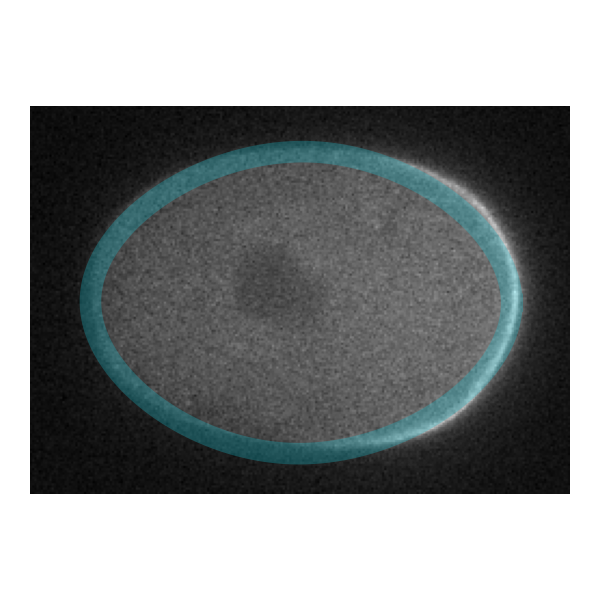

In [10]:
rotated1, rotated1_roi = rotated_embryo(img, roi_manual, 250, 180, 3, return_roi=True)

fig, ax = plt.subplots()
ax.imshow(rotated1, cmap='gray')
# ax.plot(rotated1_roi[:, 0], rotated1_roi[:, 1], linestyle='--', c='tab:cyan')
line = LineDataUnits(rotated1_roi[:, 0], rotated1_roi[:, 1], c='tab:cyan', linewidth=10, alpha=0.3)
ax.add_line(line)
ax.axis('off')
fig.set_size_inches(3,3)
fig.tight_layout()
fig.savefig('Figs_segmentation/roi_before.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


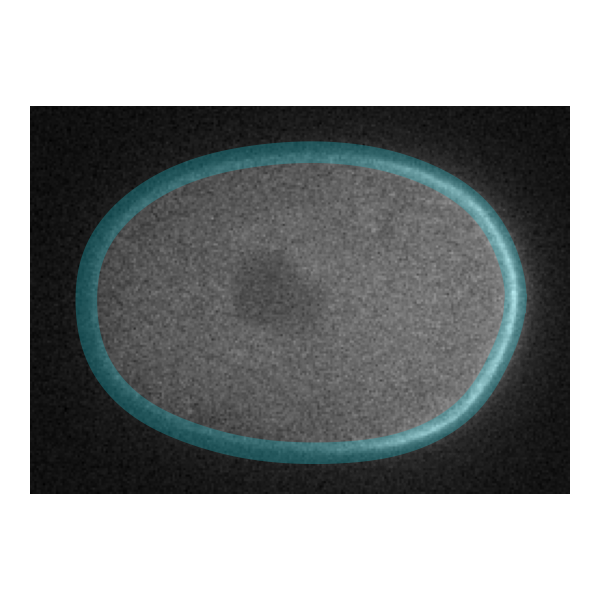

In [11]:
rotated2, rotated2_roi = rotated_embryo(img, roi, 250, 180, 3, return_roi=True)

fig, ax = plt.subplots()
ax.imshow(rotated2, cmap='gray')
# ax.plot(rotated2_roi[:, 0], rotated2_roi[:, 1], linestyle='--', c='tab:cyan')
line = LineDataUnits(rotated2_roi[:, 0], rotated2_roi[:, 1], c='tab:cyan', linewidth=10, alpha=0.3)
ax.add_line(line)
ax.axis('off')
fig.set_size_inches(3,3)
fig.tight_layout()
fig.savefig('Figs_segmentation/roi_after.png', dpi=600, transparent=True)

### Straight

(50, 522)


<IPython.core.display.Javascript object>


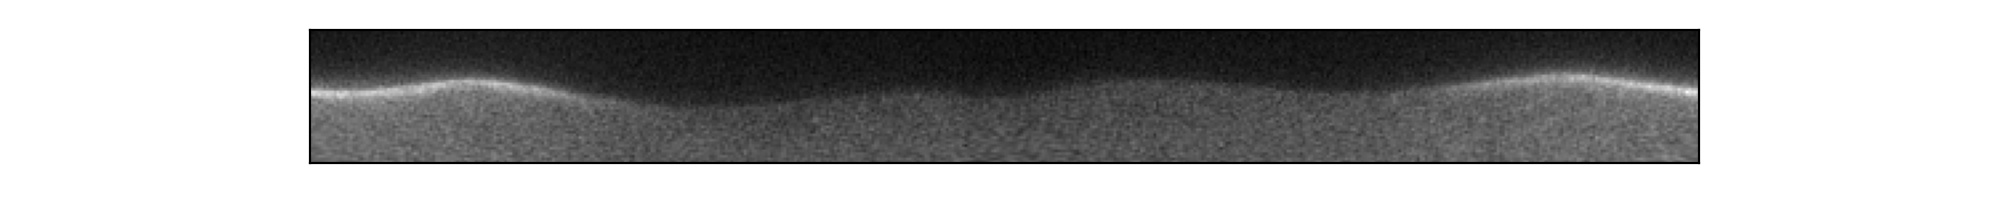

In [6]:
straight = straighten(img, roi_manual, 50)
print(straight.shape)

fig, ax = plt.subplots()
ax.imshow(straight, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
fig.set_size_inches(10,1)
fig.tight_layout()
fig.savefig('Figs_segmentation/straight_before.png', dpi=600, transparent=True)

(50, 543)


<IPython.core.display.Javascript object>


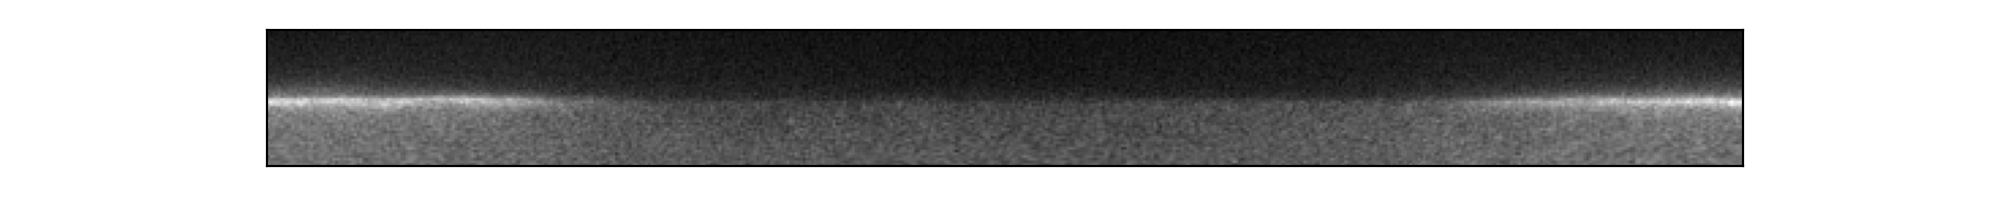

In [7]:
straight = straighten(img, roi, 50)
print(straight.shape)

fig, ax = plt.subplots()
ax.imshow(straight, cmap='gray')
ax.set_xticks([])
ax.set_yticks([])
fig.set_size_inches(10,1)
fig.tight_layout()
fig.savefig('Figs_segmentation/straight_after.png', dpi=600, transparent=True)

### Offsets

In [8]:
iq = ImageQuant(img=img, roi=roi_manual, cytbg=cytbg, uni_cyt=True, adaptive_membg=True, 
                batch_norm=False, descent_steps=300, rol_ave=5, lr=0.01, iterations=1, rotate=False,
                interp_type='cubic', roi_knots=20, save_training=True, sigma=2, save_sims=False)
iq.run()

100%|██████████| 300/300 [00:10<00:00, 28.11it/s]

Time elapsed: 10.77 seconds 


<IPython.core.display.Javascript object>


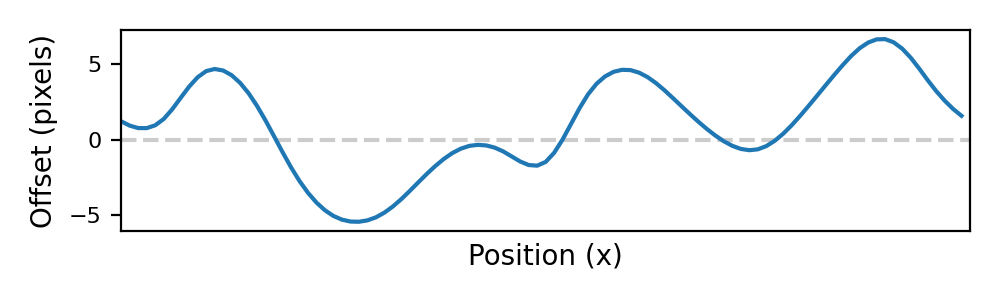

In [9]:
fig, ax = plt.subplots()

ax.plot(iq.offsets[0])
ax.axhline(0, c='k', linestyle='--', alpha=0.2, zorder=0)
ax.set_xlabel('Position (x)')
ax.set_ylabel('Offset (pixels)')
ax.tick_params(axis='both', labelsize=8)
ax.set_xticks([])
ax.set_xlim(0, 100)
fig.set_size_inches(5,1.5)
fig.tight_layout()
fig.savefig('Figs_segmentation/offsets.png', dpi=600, transparent=True)